In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as prs
import seaborn as sns
import plotly.express as px

In [2]:
url='/Users/sumedhajauhari/Downloads/Analytics_Sample_Data_rsc.csv'
df=pd.read_csv(url)
df.sample(10)

,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
1805,17 00:30:30,17 00:32:34,NaN,17 01:03:49,29,100,1841,False,Palo Alto,True,38.08,0.0,1.90,0.00
15577,13 02:50:46,13 02:57:00,13 03:18:11,13 04:06:49,274,115,97414,True,Mountain View,True,47.05,6.0,5.66,0.00
4787,01 03:22:23,01 03:23:29,01 03:40:55,01 03:54:37,66,18,5480,True,Palo Alto,True,16.82,0.0,0.84,0.00
13683,20 19:58:05,20 20:16:25,20 20:39:55,20 20:56:18,141,216,73139,True,Mountain View,True,25.47,0.0,1.27,0.00
13183,05 01:47:56,05 01:51:29,05 02:14:52,05 02:33:02,69,211,64514,False,Palo Alto,True,48.25,6.0,2.41,0.00
5270,14 22:25:43,15 00:13:04,15 00:13:53,15 00:36:19,194,249,6245,False,Palo Alto,False,53.63,0.0,2.19,0.00
485,21 23:20:49,21 23:39:54,21 23:56:21,22 00:21:14,358,9,640,True,Palo Alto,False,63.64,0.0,2.65,0.00
13512,17 04:59:16,17 05:00:06,17 05:12:06,17 05:48:14,363,107,70575,False,Palo Alto,True,44.01,0.0,1.74,0.00
3277,11 00:49:57,11 00:50:32,11 01:13:24,11 01:49:32,206,68,3301,True,Palo Alto,True,28.73,0.0,1.04,0.00
920,26 02:15:37,26 03:00:23,NaN,26 03:43:54,87,87,1036,False,Mountain View,True,62.93,0.0,2.61,33.27


In [10]:
df.shape

(18078, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18078 entries, 0 to 18077
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_placed_order_datetime         18078 non-null  object 
 1   Placed_order_with_restaurant_datetime  18038 non-null  object 
 2   Driver_at_restaurant_datetime          13547 non-null  object 
 3   Delivered_to_consumer_datetime         18078 non-null  object 
 4   Driver_ID                              18078 non-null  int64  
 5   Restaurant_ID                          18078 non-null  int64  
 6   Consumer_ID                            18078 non-null  int64  
 7   Is_New                                 18078 non-null  bool   
 8   Delivery_Region                        18078 non-null  object 
 9   Is_ASAP                                18078 non-null  bool   
 10  Order_total                            18078 non-null  float64
 11  Am

In [7]:
df[['Driver_ID','Order_total','Amount_of_discount']].corr()

,Driver_ID,Order_total,Amount_of_discount
Driver_ID,1.000000,-0.050479,0.003020
Order_total,-0.050479,1.000000,0.038844
Amount_of_discount,0.003020,0.038844,1.000000


In [51]:
df.describe()

,Driver_ID,Restaurant_ID,Consumer_ID,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
count,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000,18078.000000
mean,222.448169,108.721263,32010.313475,51.261496,1.356706,3.492022,0.612091
std,105.219194,98.609766,42010.215766,50.599675,6.516667,3.700115,6.073104
min,7.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,141.000000,23.000000,4243.500000,26.660000,0.000000,1.400000,0.000000
50%,227.000000,77.000000,10972.000000,38.630000,0.000000,2.550000,0.000000
75%,314.000000,186.000000,56857.000000,57.885000,0.000000,4.460000,0.000000
max,438.000000,409.000000,200449.000000,1604.130000,187.880000,120.300000,414.770000


In [61]:
df.describe(include='all')

,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
count,18078,18038,13547,18078,18078.000000,18078.000000,18078.000000,18078,18078,18078,18078.000000,18078.000000,18078.000000,18078.000000
unique,17888,17905,13382,17886,NaN,NaN,NaN,2,4,2,NaN,NaN,NaN,NaN
top,22 01:04:04,19 03:48:54,30 01:56:37,21 19:16:02,NaN,NaN,NaN,False,Palo Alto,True,NaN,NaN,NaN,NaN
freq,3,2,3,2,NaN,NaN,NaN,14566,11433,14435,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,222.448169,108.721263,32010.313475,NaN,NaN,NaN,51.261496,1.356706,3.492022,0.612091
std,NaN,NaN,NaN,NaN,105.219194,98.609766,42010.215766,NaN,NaN,NaN,50.599675,6.516667,3.700115,6.073104
min,NaN,NaN,NaN,NaN,7.000000,2.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,141.000000,23.000000,4243.500000,NaN,NaN,NaN,26.660000,0.000000,1.400000,0.000000
50%,NaN,NaN,NaN,NaN,227.000000,77.000000,10972.000000,NaN,NaN,NaN,38.630000,0.000000,2.550000,0.000000
75%,NaN,NaN,NaN,NaN,314.000000,186.000000,56857.000000,NaN,NaN,NaN,57.885000,0.000000,4.460000,0.000000


In [52]:
df.isnull().sum()

Customer_placed_order_datetime              0
Placed_order_with_restaurant_datetime      40
Driver_at_restaurant_datetime            4531
Delivered_to_consumer_datetime              0
Driver_ID                                   0
Restaurant_ID                               0
Consumer_ID                                 0
Is_New                                      0
Delivery_Region                             0
Is_ASAP                                     0
Order_total                                 0
Amount_of_discount                          0
Amount_of_tip                               0
Refunded_amount                             0
dtype: int64

In [53]:
df.columns

Index(['Customer_placed_order_datetime',
       'Placed_order_with_restaurant_datetime',
       'Driver_at_restaurant_datetime', 'Delivered_to_consumer_datetime',
       'Driver_ID', 'Restaurant_ID', 'Consumer_ID', 'Is_New',
       'Delivery_Region', 'Is_ASAP', 'Order_total', 'Amount_of_discount',
       'Amount_of_tip', 'Refunded_amount'],
      dtype='object')

In [54]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col,df[col].unique(),"\n")

Customer_placed_order_datetime ['14 20:27:45' '07 20:16:28' '13 19:35:09' ... '30 18:20:01' '27 21:48:21'
 '30 01:58:19'] 

Placed_order_with_restaurant_datetime ['14 20:29:41' '07 20:17:32' '13 19:39:26' ... '30 18:24:13' '27 21:57:50'
 '30 01:59:16'] 

Driver_at_restaurant_datetime ['14 20:39:32' '07 20:36:00' '13 20:28:16' ... '28 05:04:47' '18 02:20:36'
 '30 18:57:09'] 

Delivered_to_consumer_datetime ['14 20:52:03' '07 20:49:02' '13 20:52:44' ... '30 19:31:20' '27 22:36:59'
 '30 02:41:31'] 

Delivery_Region ['Palo Alto' 'Mountain View' 'San Jose' 'None'] 



In [57]:
df_none=df[df['Delivery_Region']!='None']
df_none.shape[0]

18052

In [58]:
df_none=df[(df['Amount_of_tip'] < 20) & (df['Delivery_Region'] != 'None')]
df_none

,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount
0,14 20:27:45,14 20:29:41,14 20:39:32,14 20:52:03,86,12,5,False,Palo Alto,True,20.45,20.45,3.07,0.00
1,07 20:16:28,07 20:17:32,07 20:36:00,07 20:49:02,325,66,5,False,Palo Alto,True,40.62,40.62,3.73,0.00
2,13 19:35:09,13 19:39:26,13 20:28:16,13 20:52:44,200,124,5,False,Palo Alto,True,37.78,37.78,1.89,0.00
3,22 19:47:53,22 19:56:08,22 20:01:20,22 20:18:01,154,5,14,False,Palo Alto,True,39.66,0.00,1.98,0.00
4,03 19:01:52,03 19:09:08,03 19:36:20,03 19:45:26,332,9,14,False,Palo Alto,True,39.66,0.00,5.95,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18073,20 00:39:30,20 00:40:31,NaN,20 01:17:29,36,270,96518,False,San Jose,True,44.59,0.00,3.54,13.58
18074,26 19:59:56,26 20:05:45,NaN,26 21:00:14,264,294,96518,False,San Jose,True,19.03,0.00,1.19,20.22
18075,30 18:20:01,30 18:24:13,30 18:57:09,30 19:31:20,232,294,96518,False,San Jose,True,23.93,0.00,0.82,24.75
18076,27 21:48:21,27 21:57:50,NaN,27 22:36:59,300,370,100694,False,Mountain View,True,31.45,0.00,0.00,0.00


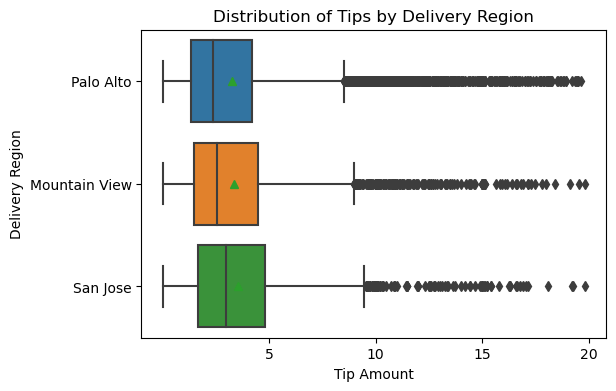

In [60]:
# Create the boxplots
plt.figure(figsize=(6,4))
sns.boxplot(
    x = "Amount_of_tip",
    y = "Delivery_Region",  # Assuming your delivery region column is named "Region"
    showmeans=True,  # Display mean markers for each box
    data=df_none
)

# Customize the plot
plt.title("Distribution of Tips by Delivery Region")
plt.xlabel("Tip Amount")
plt.ylabel("Delivery Region")
plt.xticks([5, 10, 15, 20])
plt.show()

In [62]:
q1 = df.groupby('Delivery_Region')['Amount_of_tip'].quantile(0.25)
q2 = df.groupby('Delivery_Region')['Amount_of_tip'].median()
q3 = df.groupby('Delivery_Region')['Amount_of_tip'].quantile(0.75)

# Combine results into a DataFrame
region_stats = pd.DataFrame({
    'Q1': q1,
    'Q2': q2,
    'Q3': q3
})

print(region_stats)

                    Q1      Q2       Q3
Delivery_Region                        
Mountain View    1.500   2.595   4.6200
None             7.445  10.000  17.7125
Palo Alto        1.330   2.410   4.2700
San Jose         1.650   2.990   4.8100


In [65]:
df['Tip_Percentage'] = df['Amount_of_tip'] / df['Order_total'] * 100  # Calculate tip percentage
#region_stats = df.groupby('Delivery_Region')['Tip_Percentage'].mean()  # Get average tip percentage for each region

In [66]:
q1 = df.groupby('Delivery_Region')['Tip_Percentage'].quantile(0.25)
q2 = df.groupby('Delivery_Region')['Tip_Percentage'].median()
q3 = df.groupby('Delivery_Region')['Tip_Percentage'].quantile(0.75)

# Combine results into a DataFrame
region_stats = pd.DataFrame({
    'Q1': q1,
    'Q2': q2,
    'Q3': q3
})

print(region_stats)

                       Q1        Q2         Q3
Delivery_Region                               
Mountain View    4.141569  5.012151   9.991059
None             6.428292  8.912028   9.759907
Palo Alto        4.024739  5.004136   8.660614
San Jose         4.993191  7.881076  11.361306


In [72]:
# Split datetime column
df['Delivery_Day'] = df['Delivered_to_consumer_datetime'].str[:2].astype(int)
df['Delivery_Time'] = pd.to_datetime(df['Delivered_to_consumer_datetime'].str[3:]).dt.time
df.sample(10)

,Customer_placed_order_datetime,Placed_order_with_restaurant_datetime,Driver_at_restaurant_datetime,Delivered_to_consumer_datetime,Driver_ID,Restaurant_ID,Consumer_ID,Is_New,Delivery_Region,Is_ASAP,Order_total,Amount_of_discount,Amount_of_tip,Refunded_amount,Tip_Percentage,Day,Time,Delivery_Day,Delivery_Time
15774,15 00:54:18,15 00:58:16,15 01:06:48,15 01:44:51,243,289,100604,True,San Jose,True,44.28,6.0,3.00,0.0,6.775068,15,01:44:51,15,01:44:51
9005,17 04:29:12,17 04:29:36,17 04:37:24,17 04:49:06,314,3,11992,False,Palo Alto,True,17.91,0.0,1.64,0.0,9.156896,17,04:49:06,17,04:49:06
14449,29 02:04:54,29 02:29:18,29 02:50:32,29 03:10:20,407,178,82132,False,San Jose,True,29.93,0.0,3.30,0.0,11.025727,29,03:10:20,29,03:10:20
2326,18 00:28:43,18 00:28:54,18 00:36:42,18 00:53:31,343,10,2376,False,Palo Alto,True,45.15,0.0,1.80,0.0,3.986711,18,00:53:31,18,00:53:31
16804,26 21:30:37,26 21:31:35,NaN,26 22:14:23,264,148,192733,False,San Jose,True,88.98,6.0,11.44,0.0,12.856822,26,22:14:23,26,22:14:23
8384,07 19:28:02,07 19:30:36,07 19:40:08,07 19:56:42,330,30,11055,False,Mountain View,True,42.38,0.0,5.00,0.0,11.798018,7,19:56:42,7,19:56:42
561,15 01:58:14,15 02:14:40,15 02:22:24,15 02:29:21,200,12,682,False,Palo Alto,True,16.88,0.0,0.50,0.0,2.962085,15,02:29:21,15,02:29:21
7348,07 00:23:24,07 00:23:45,07 00:34:38,07 00:56:40,98,97,9487,False,Palo Alto,True,28.46,0.0,1.03,0.0,3.619115,7,00:56:40,7,00:56:40
16314,20 21:57:06,20 21:57:56,20 22:09:39,20 22:25:43,84,62,109422,False,Palo Alto,True,35.85,6.0,1.37,0.0,3.821478,20,22:25:43,20,22:25:43
15186,19 02:41:49,19 02:43:01,19 03:04:24,19 04:07:33,274,98,92264,False,Mountain View,True,39.71,6.0,3.10,0.0,7.806598,19,04:07:33,19,04:07:33


In [80]:
df_count = df.groupby('Delivery_Day')['Driver_ID'].nunique().reset_index(name='Number_of_Drivers')
df_count

,Delivery_Day,Number_of_Drivers
0,1,95
1,2,108
2,3,100
3,4,102
4,5,88
5,6,75
6,7,92
7,8,85
8,9,101
9,10,97


IndentationError: unexpected indent (526911132.py, line 7)